### Name- Anisha Gurbani
### Task 3 of OASIS INFORBYTE Internship

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [4]:
#loading the data from csv file
car=pd.read_csv('car data.csv')

In [5]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  

In [8]:
car.shape

(301, 9)

In [10]:
car.isnull().sum() #no null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [14]:
#checking the distribution of categorical data
car.Fuel_Type.value_counts()
     

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [17]:
car.Selling_type.value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [18]:
car.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

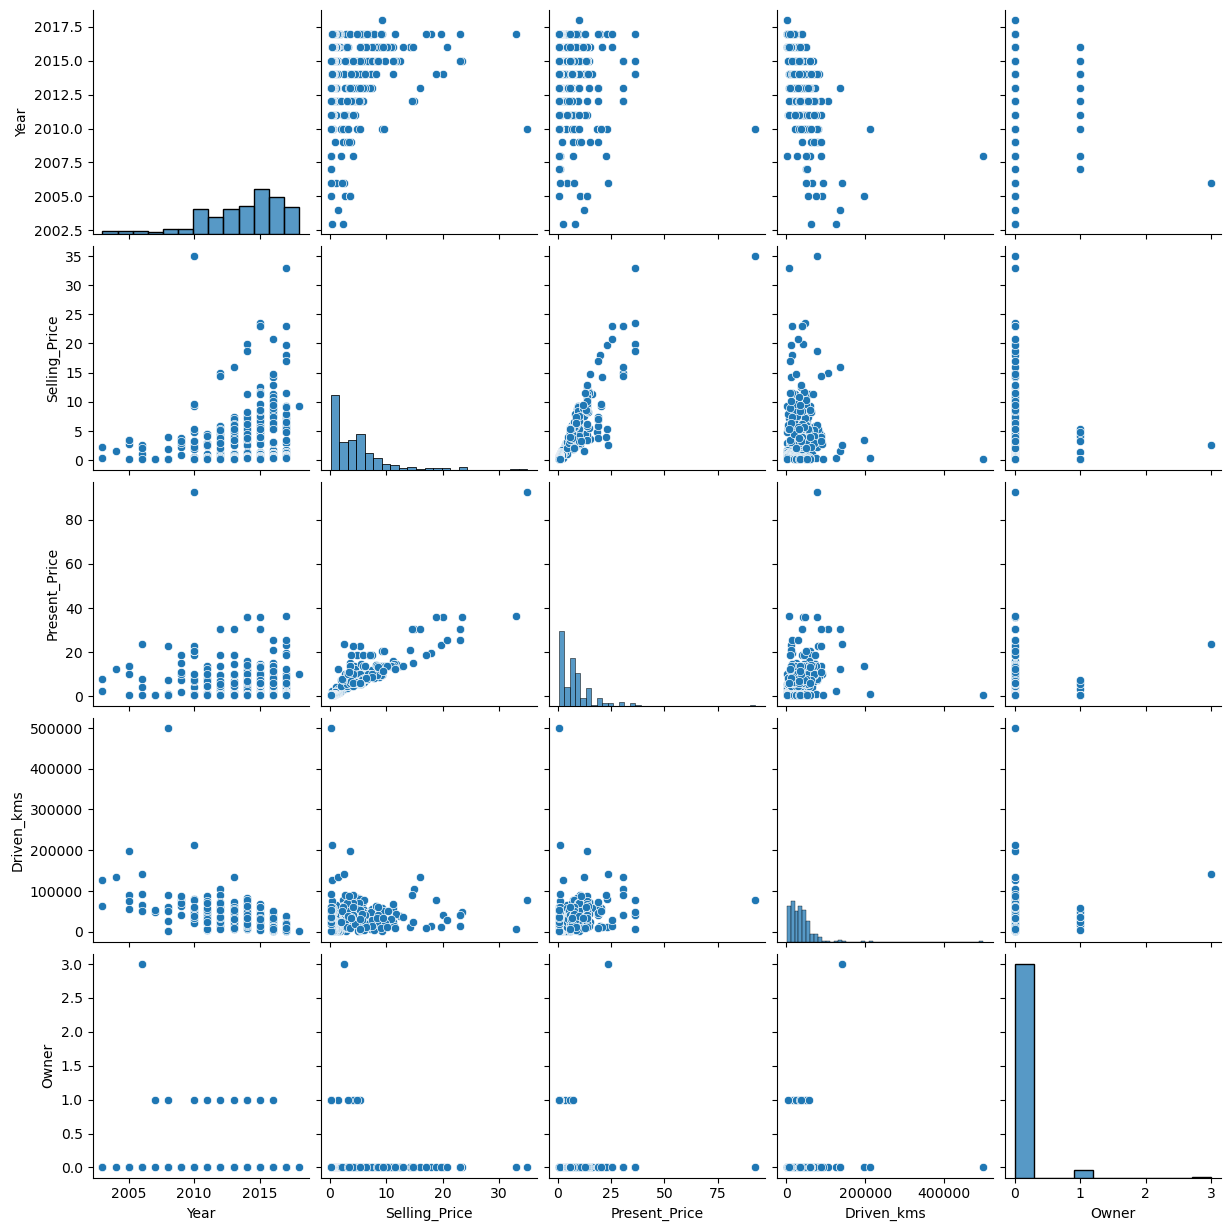

In [19]:
sns.pairplot(car)
plt.show()

In [20]:
corre=car.corr()

In [21]:
corre

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


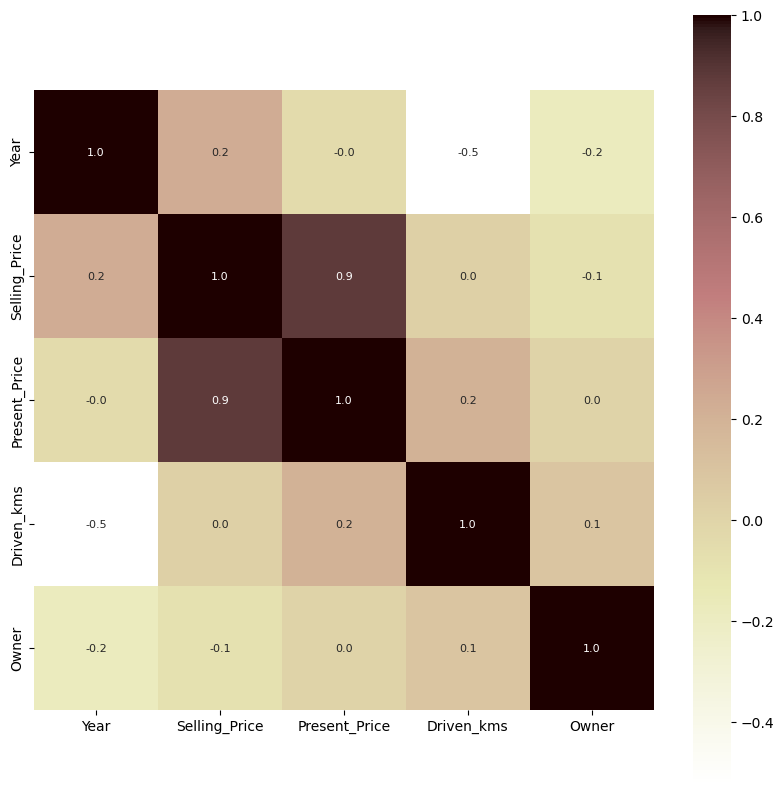

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corre,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="pink_r")
plt.show()

In [34]:
encoder=LabelEncoder()
car['Fuel_Type'] = encoder.fit_transform(car['Fuel_Type'])
car['Selling_type'] = encoder.fit_transform(car['Selling_type'])
car['Transmission'] = encoder.fit_transform(car['Transmission'])


In [35]:
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [38]:

X =car.drop(['Car_Name','Selling_Price'],axis=1)
Y=car['Selling_Price']
     

In [39]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [40]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### USING LINEAR REG MODEL

In [42]:
li=LinearRegression()


In [43]:
li.fit(X_train,Y_train)

LinearRegression()

In [44]:
#prediction on Training data
training_data_prediction = li.predict(X_train)

In [47]:
#R squared Data
score = metrics.r2_score(Y_train,training_data_prediction)

In [48]:
score

0.8836563703329293

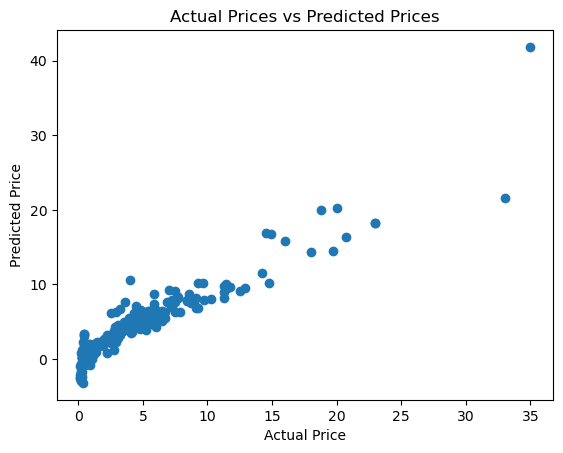

In [49]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [51]:

#prediction on test data
test_data_prediction=li.predict(X_test)

In [52]:

#R squared Data
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [53]:
error_score

0.8466902419663433

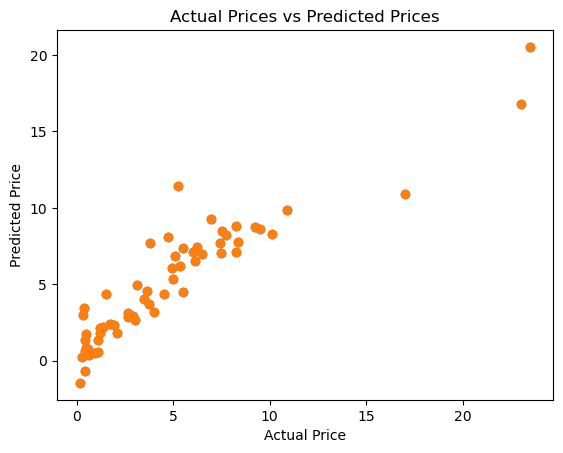

In [55]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

### Using Lasso Regression

In [62]:
li1=Lasso()


In [63]:
li1.fit(X_train,Y_train)

Lasso()

In [64]:
pred = li1.predict(X_train)

In [65]:

#R squared error
error_score = metrics.r2_score(Y_train,pred)

In [66]:

error_score

0.847667844478283

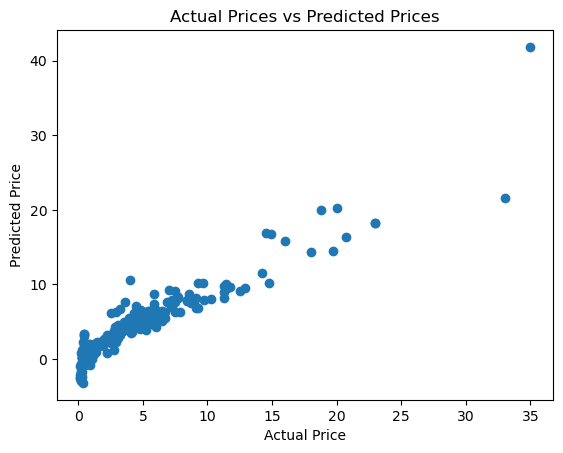

In [67]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [69]:
predi=li1.predict(X_test)

In [70]:
#R squared Data
error_score = metrics.r2_score(Y_test,predi)


In [71]:

error_score

0.7983673764076525

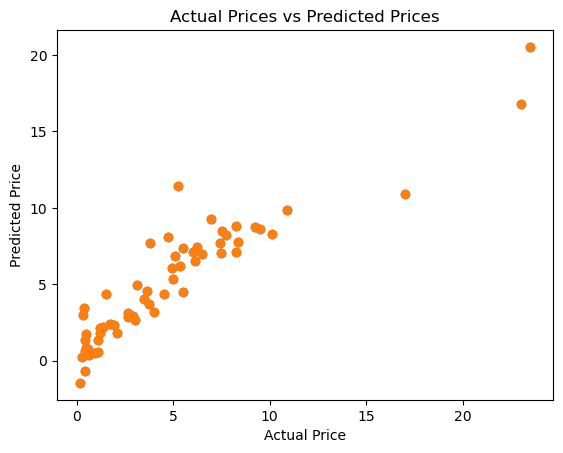

In [73]:

plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()